# Diabet Project 

### Projenin amacı Pima indian diabet veri setini inceleyerek bilgileri girilen hastanın diyabet olup olmadığını belirlemek.
##### İstenilen sonuca ulaşılabilirse asıl hedef Türkiye sağlık verilerini kullanılarak  sağlık sisteminin yükünü azaltacak projeler geliştirmek.

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_ = pd.read_excel("C:/Users/COK/Desktop/proje/Diyabet_silinmis_satır_doldurulmuş.xlsx")

In [4]:
df=df_.copy()

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,5,116.0,74.0,33.5,128.0,25.6,0.201,30,0
3,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
4,10,115.0,60.0,38.5,315.5,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
753,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
754,2,122.0,70.0,27.0,146.0,36.8,0.340,27,0
755,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
756,1,126.0,60.0,27.0,112.0,30.1,0.349,47,1


## Data Preparation

In [6]:
df.shape

(758, 9)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,758.0,3.836412,3.371282,0.000,1.000,3.000,6.00000,17.00
Glucose,758.0,121.668206,30.481328,44.000,99.000,117.000,140.75000,199.00
BloodPressure,758.0,72.381266,12.269126,24.000,64.000,72.000,80.00000,122.00
SkinThickness,758.0,29.102902,9.920293,7.000,22.000,29.000,36.00000,99.00
Insulin,758.0,159.039578,111.971090,14.000,88.000,130.000,190.37500,846.00
BMI,758.0,32.484828,6.911268,18.200,27.500,32.400,36.60000,67.10
DiabetesPedigreeFunction,758.0,0.473826,0.332450,0.078,0.244,0.377,0.62825,2.42
Age,758.0,33.306069,11.786800,21.000,24.000,29.000,41.00000,81.00
Outcome,758.0,0.349604,0.477160,0.000,0.000,0.000,1.00000,1.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               758 non-null    int64  
 1   Glucose                   758 non-null    float64
 2   BloodPressure             758 non-null    float64
 3   SkinThickness             758 non-null    float64
 4   Insulin                   758 non-null    float64
 5   BMI                       758 non-null    float64
 6   DiabetesPedigreeFunction  758 non-null    float64
 7   Age                       758 non-null    int64  
 8   Outcome                   758 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 53.4 KB


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
summary = df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T
summary.astype(int).head()

,0.00,0.05,0.50,0.95,0.99,1.00
Pregnancies,0,0,3,10,13,17
Glucose,44,80,117,181,196,199
BloodPressure,24,52,72,90,106,122
SkinThickness,7,14,29,45,52,99
Insulin,14,49,130,375,588,846


In [11]:
for x in df:
    print(df.groupby("Outcome").agg({x: "mean"}), end="\n\n\n")

         Pregnancies
Outcome             
0           3.302231
1           4.830189


            Glucose
Outcome            
0        110.809331
1        141.869811


         BloodPressure
Outcome               
0            70.914807
1            75.109434


         SkinThickness
Outcome               
0            27.671095
1            31.766604


            Insulin
Outcome            
0        143.781232
1        187.425860


               BMI
Outcome           
0        30.888742
1        35.454151


         DiabetesPedigreeFunction
Outcome                          
0                        0.432426
1                        0.550845


               Age
Outcome           
0        31.286004
1        37.064151


         Outcome
Outcome         
0            0.0
1            1.0




## Corralation Analysis

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.123568,0.198769,0.088999,0.114964,0.022115,-0.035174,0.548125,0.216262
Glucose,0.123568,1.000000,0.217409,0.183729,0.364288,0.234870,0.131416,0.262846,0.486226
BloodPressure,0.198769,0.217409,1.000000,0.174649,0.051765,0.273429,-0.006972,0.318208,0.163134
SkinThickness,0.088999,0.183729,0.174649,1.000000,0.137768,0.493460,0.101226,0.129465,0.196991
Insulin,0.114964,0.364288,0.051765,0.137768,1.000000,0.134841,0.099297,0.161687,0.185990
BMI,0.022115,0.234870,0.273429,0.493460,0.134841,1.000000,0.157803,0.024650,0.315200
DiabetesPedigreeFunction,-0.035174,0.131416,-0.006972,0.101226,0.099297,0.157803,1.000000,0.027633,0.169965
Age,0.548125,0.262846,0.318208,0.129465,0.161687,0.024650,0.027633,1.000000,0.233914
Outcome,0.216262,0.486226,0.163134,0.196991,0.185990,0.315200,0.169965,0.233914,1.000000


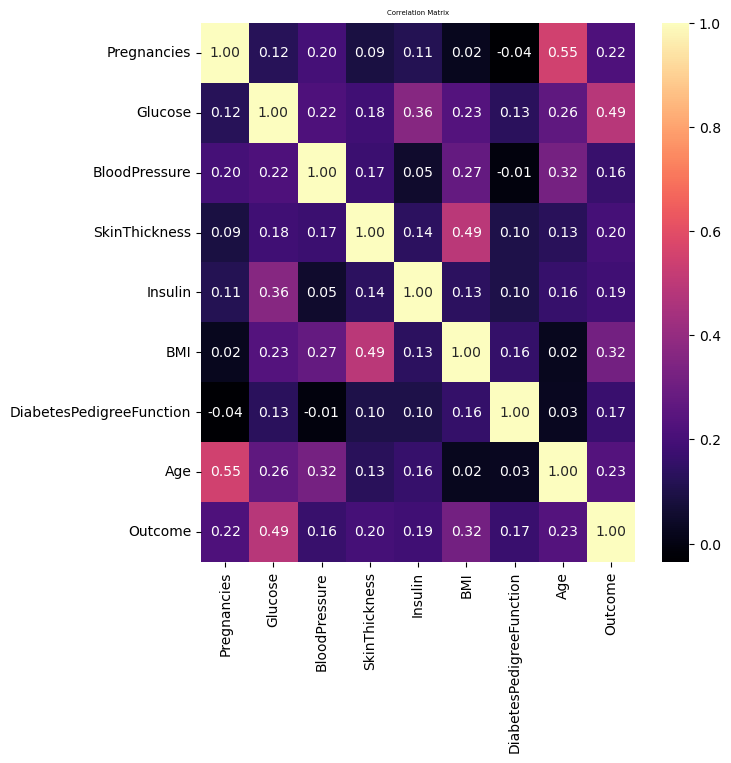

In [13]:

f, ax = plt.subplots(figsize=[7,7])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=5)
plt.show()


In [14]:
df.corrwith(df["Outcome"]).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.486226
BMI                         0.315200
Age                         0.233914
Pregnancies                 0.216262
SkinThickness               0.196991
Insulin                     0.185990
DiabetesPedigreeFunction    0.169965
BloodPressure               0.163134
dtype: float64

## Boxplot

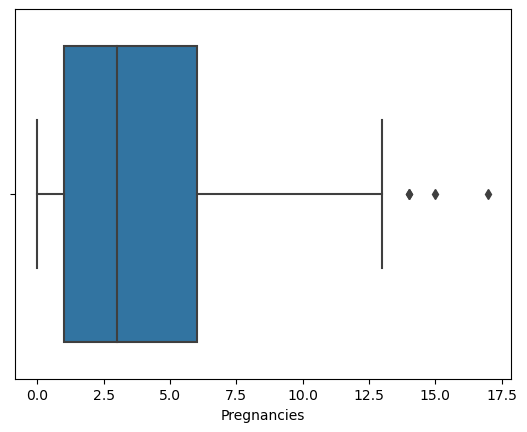

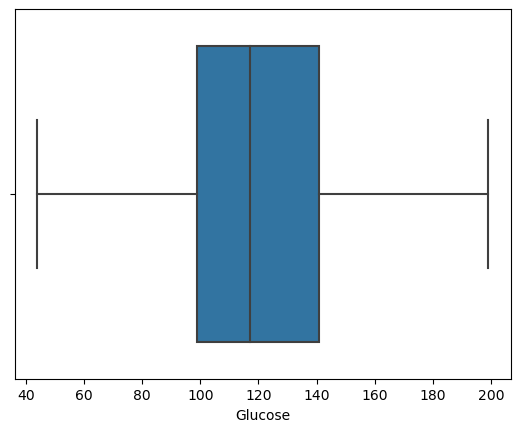

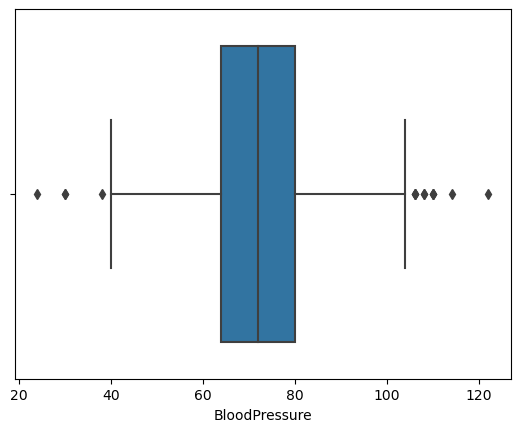

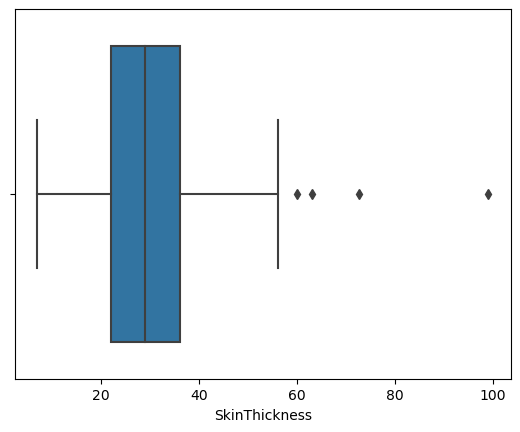

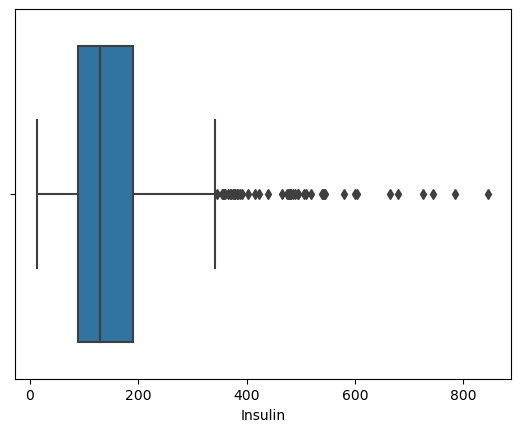

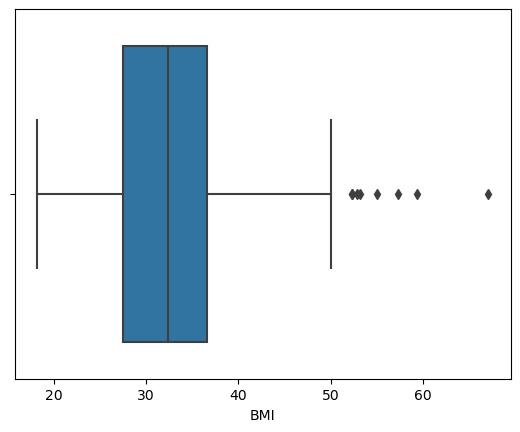

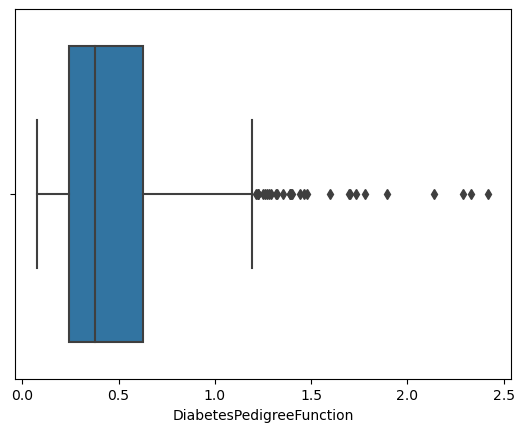

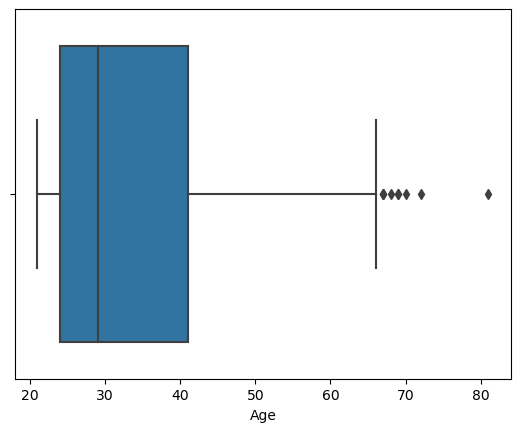

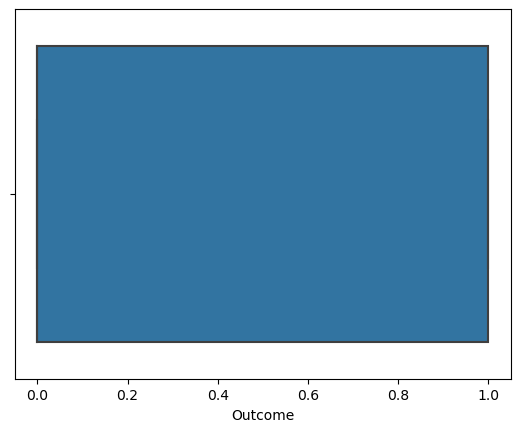

In [15]:
for x in df:
    sns.boxplot(x=df[x])
    plt.show()                

## Capping Outliers

In [16]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]) )

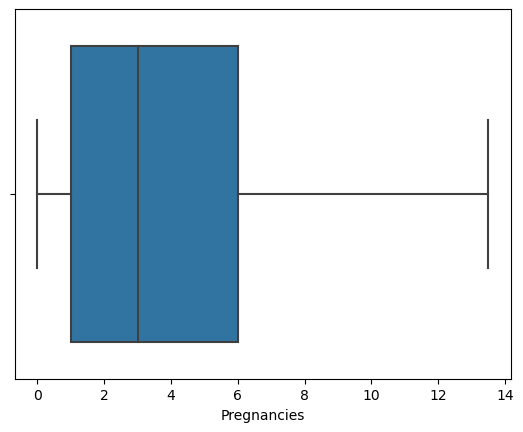

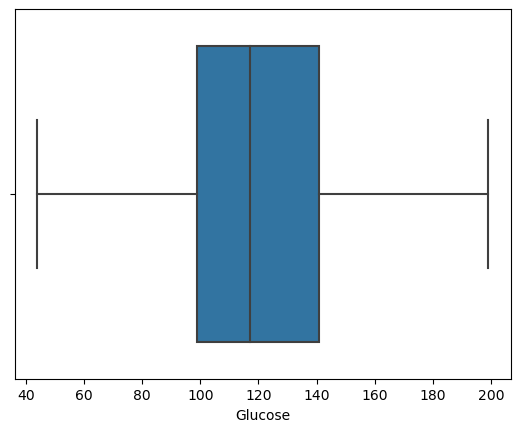

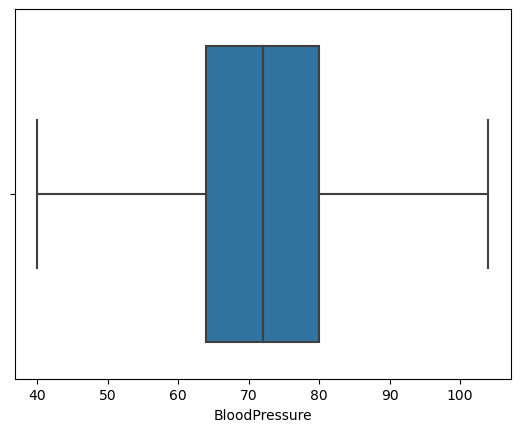

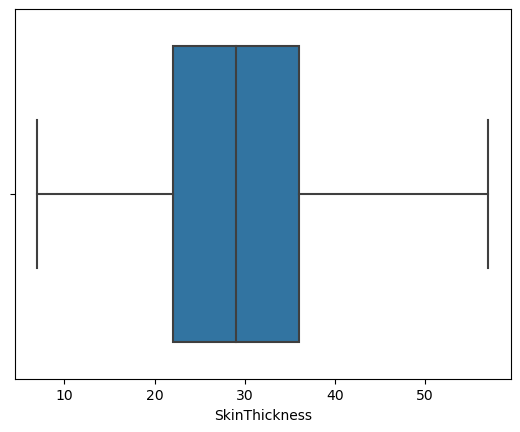

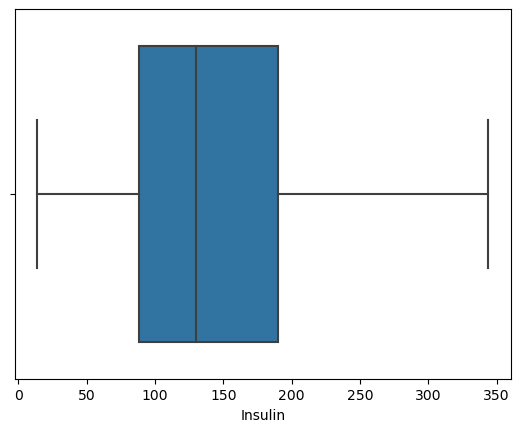

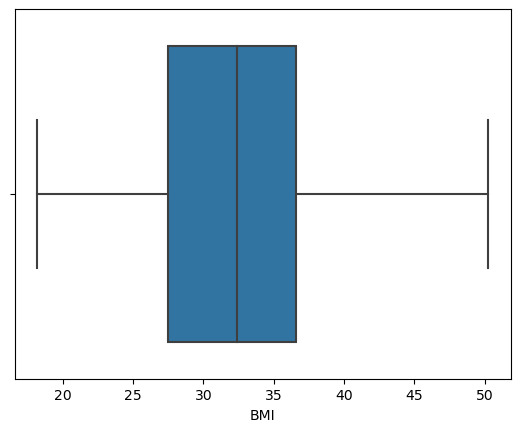

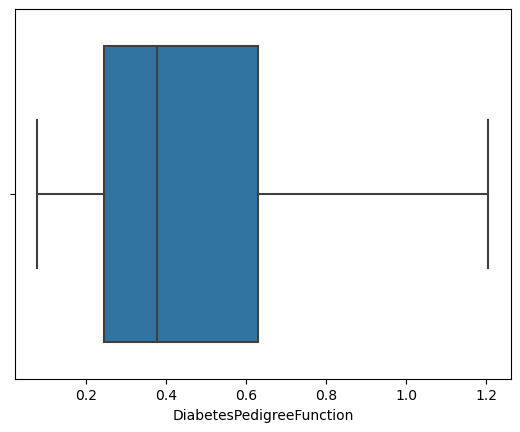

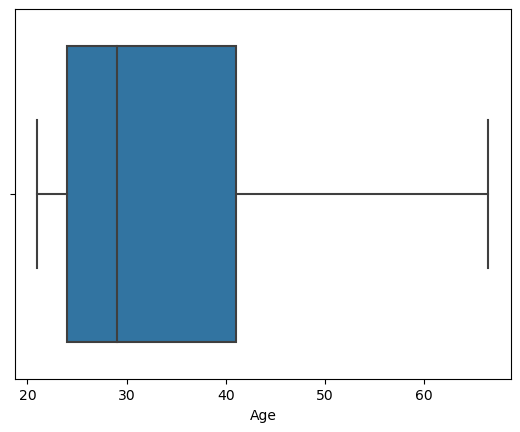

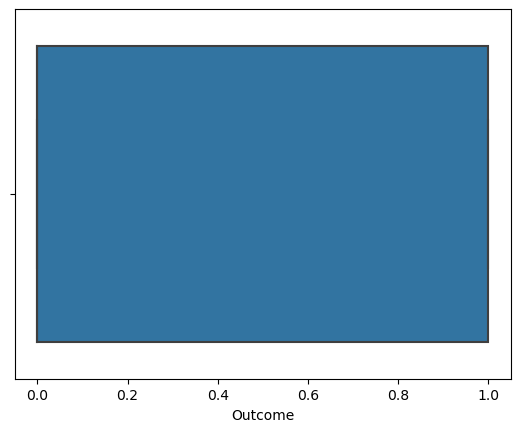

In [17]:
for x in df:
    sns.boxplot(x=df[x])
    plt.show()     

## Histogram

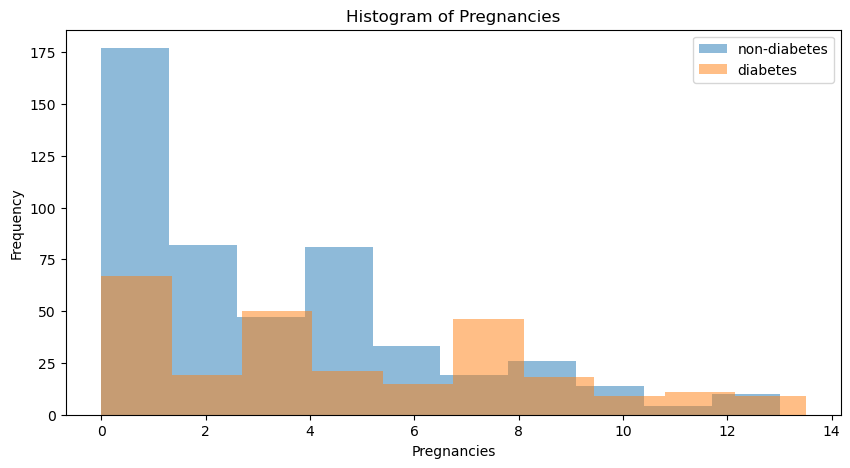

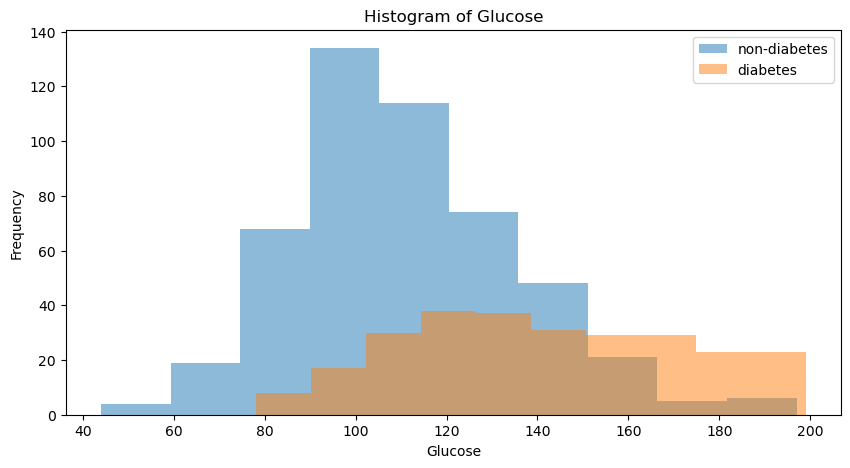

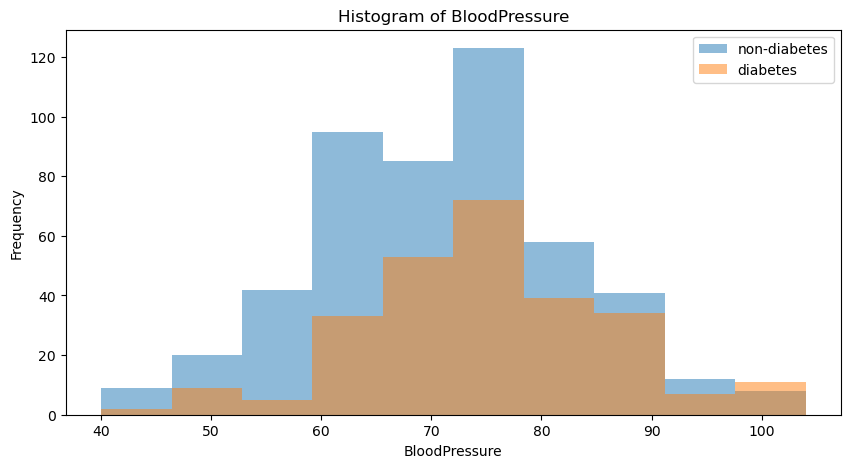

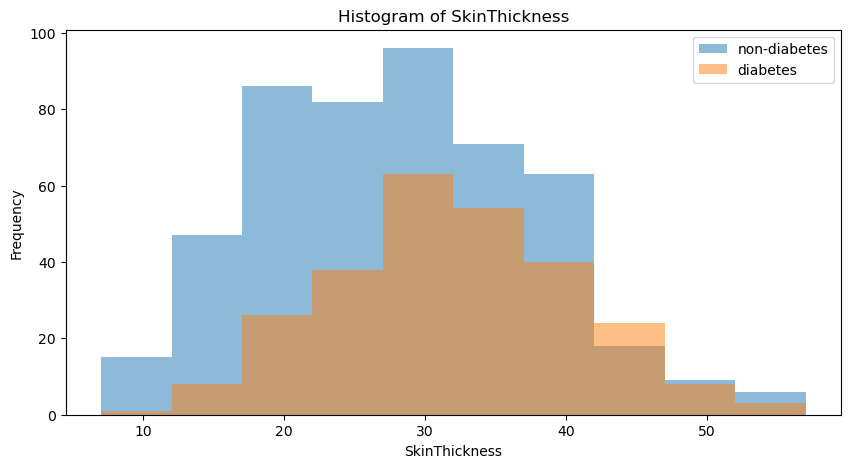

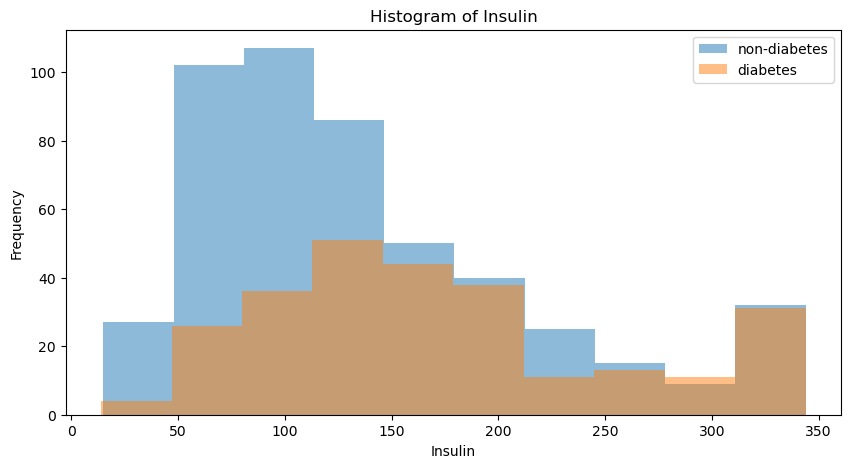

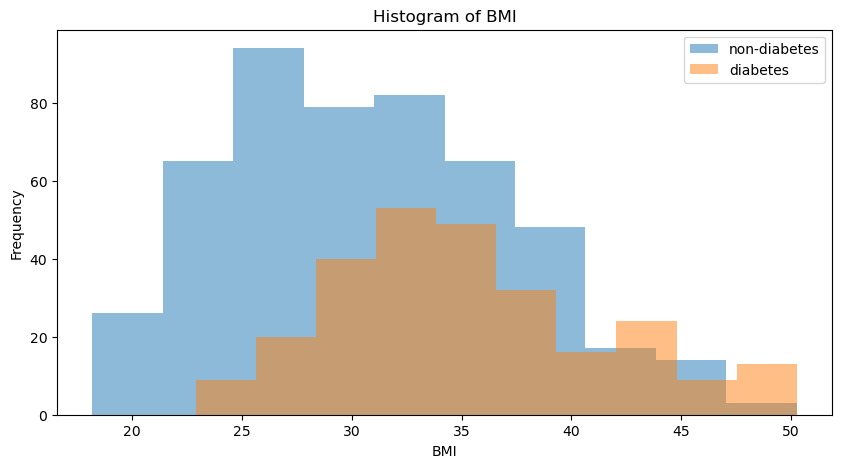

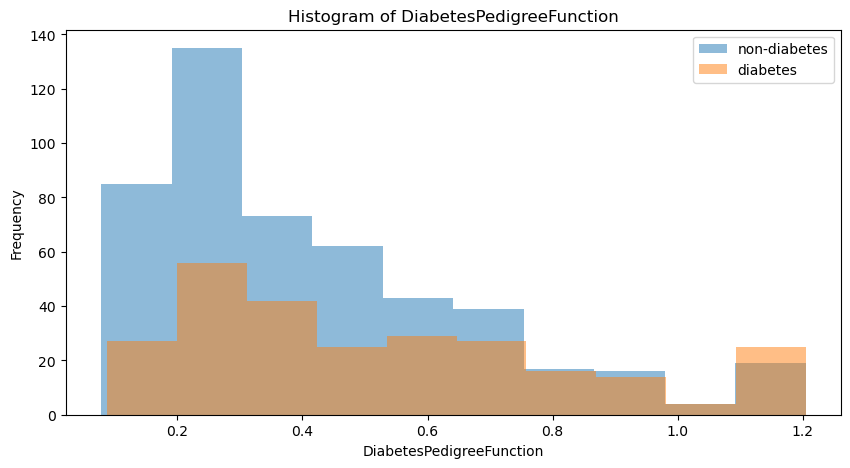

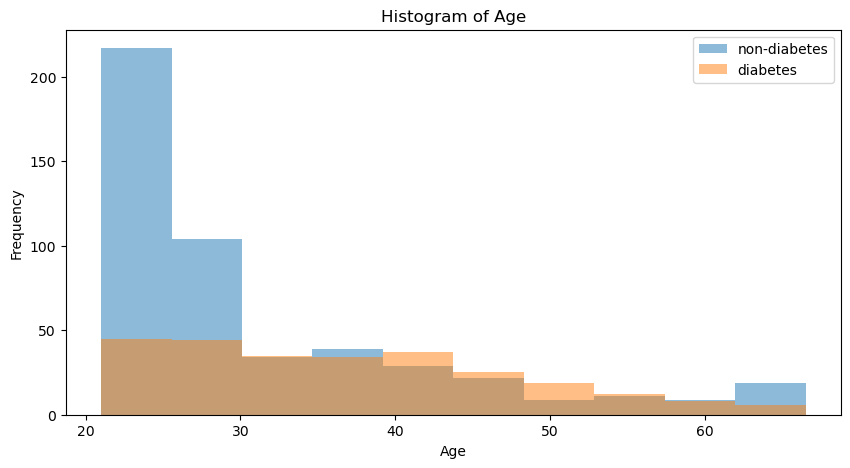

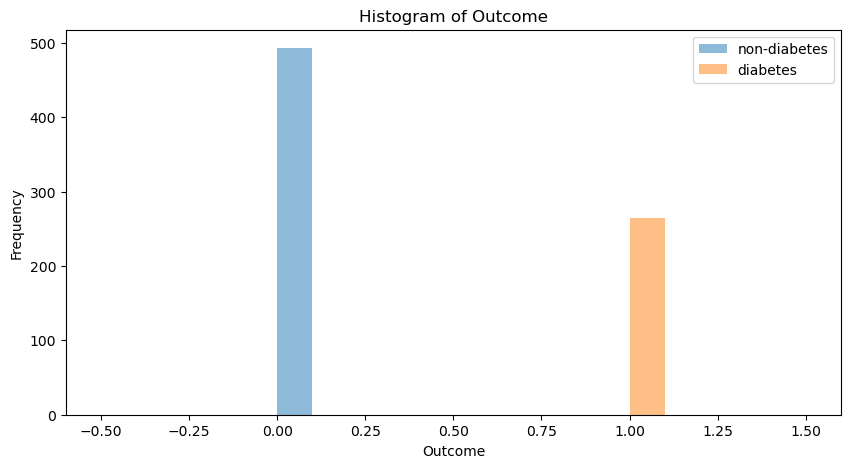

In [18]:
for col in df:
    
    plt.figure(figsize=(10,5))
    plt.hist(df[df['Outcome']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(df[df['Outcome']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

# Scatter Plot

C:\Users\COK\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


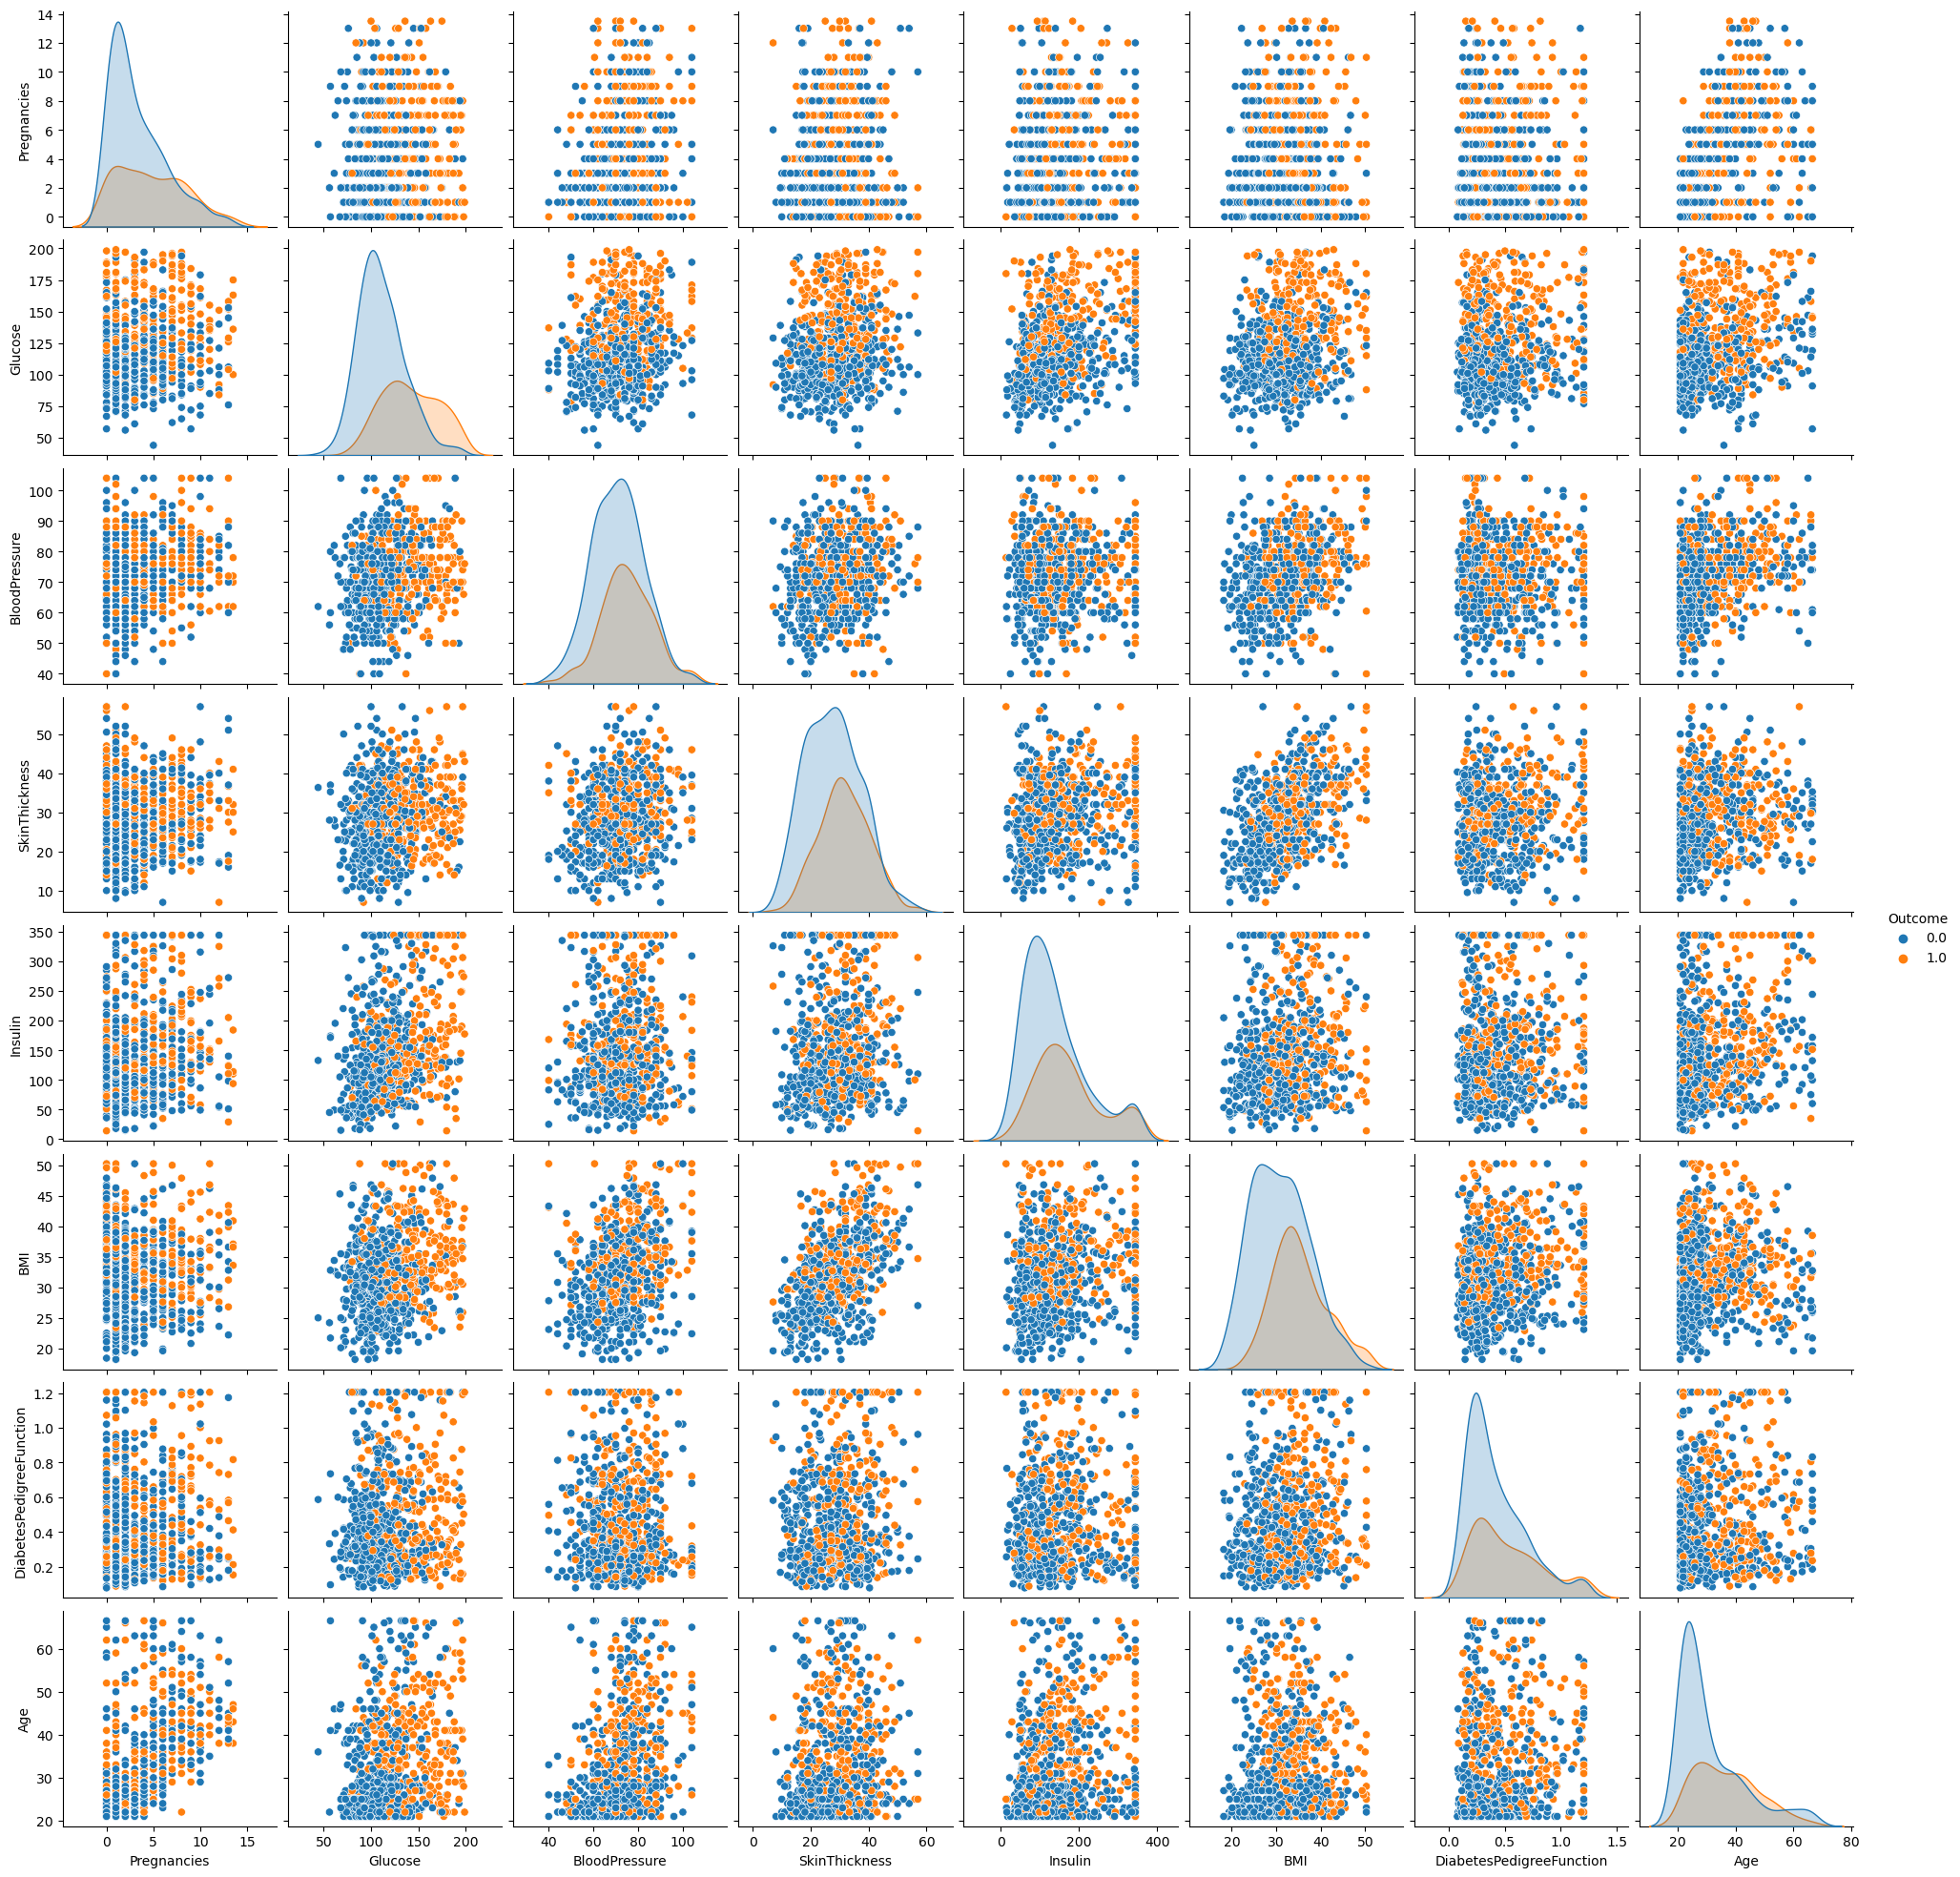

In [19]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

# İstatistik

In [20]:
df_0= df[df["Outcome"]==0]

In [21]:
df_1= df[df["Outcome"]==1]

In [22]:
import statsmodels.stats.api as sms
import scipy.stats as stats
from scipy.stats import shapiro , levene, ttest_ind , mannwhitneyu

In [23]:
for col in df:
    print ({col: shapiro(df[col])})



{'Pregnancies': ShapiroResult(statistic=0.9032549858093262, pvalue=1.7419510893636113e-21)}
{'Glucose': ShapiroResult(statistic=0.9697383642196655, pvalue=2.0279080498175617e-11)}
{'BloodPressure': ShapiroResult(statistic=0.993821918964386, pvalue=0.0033394142519682646)}
{'SkinThickness': ShapiroResult(statistic=0.9920480847358704, pvalue=0.0004336889833211899)}
{'Insulin': ShapiroResult(statistic=0.9150382280349731, pvalue=3.452008873117048e-20)}
{'BMI': ShapiroResult(statistic=0.9871811866760254, pvalue=3.4093075100827264e-06)}
{'DiabetesPedigreeFunction': ShapiroResult(statistic=0.8948939442634583, pvalue=2.4576584111103565e-22)}
{'Age': ShapiroResult(statistic=0.875960111618042, pvalue=4.345056121149101e-24)}
{'Outcome': ShapiroResult(statistic=0.602810800075531, pvalue=2.123205394191033e-38)}


In [24]:
#skin thickness ve blood pressure normal dağılmıyor!

In [25]:
stats.ttest_ind (df_0["Glucose"],df_1["Glucose"],equal_var=True)

TtestResult(statistic=-15.29926396153321, pvalue=3.1175425338612825e-46, df=756.0)

In [26]:
ttest_ind (df_0["BMI"],df_1["BMI"],equal_var=True)

TtestResult(statistic=-9.158798648931198, pvalue=4.83289742452431e-19, df=756.0)

## CLUSTER - K-MEANS

In [27]:
import pandas as pd
import argparse
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

pd.options.mode.chained_assignment = None 

In [28]:
ssd=[]
K=range(2,12)
for k in K:
    kmeans=KMeans(n_clusters=k).fit(df)
    print (k,kmeans.inertia_)
    ssd.append(kmeans.inertia_)  

2 2588223.812294882
3 1590821.176572236
4 1264060.0787295545
5 1105424.0468527526
6 977732.0448272353
7 877152.9830102554
8 816159.831336986
9 757996.1721735852
10 704963.1080615309
11 663619.3354341695


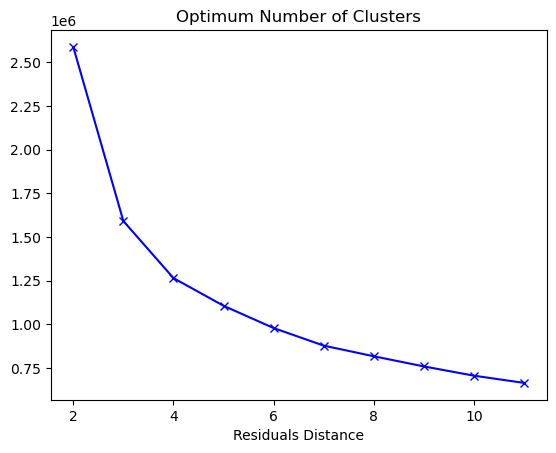

In [29]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()    

In [30]:
kmeans = KMeans(n_clusters=7).fit(df)
df.loc[:, "clusters"] = kmeans.labels_
df["clusters"].value_counts()

clusters
6    177
2    149
0    119
4    102
5     77
1     70
3     64
Name: count, dtype: int64

## Hierarchical-Clustering

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

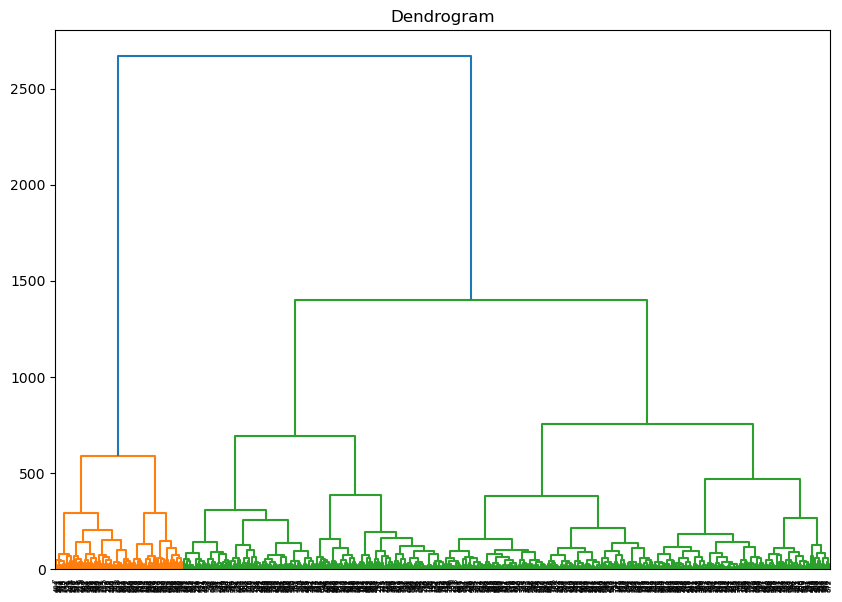

In [32]:
plt.figure(figsize =(10,7))
plt.title('Dendrogram')

linkage_method = linkage(df, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method);


# Base Model Kurulumu

In [33]:

!pip3 install catboost

!pip install lightgbm
#!conda install lightgbm
!pip install xgboost
#Use conda install in Anaconda Powershell Prompt then use pip install

#conda install -c conda-forge xgboost
#!pip install catboost



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression  #1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier     #2
from sklearn.svm import SVC

from catboost import CatBoostClassifier       #3
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Uyarilari Kapat
pd.options.mode.chained_assignment = None

# Catboost

In [35]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [37]:
catboost_model = CatBoostClassifier(verbose=False, random_state=17).fit(X_train, y_train)


In [38]:
y_pred = catboost_model.predict(X_test)

In [39]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.7675
Recall: 0.6829
Precision: 0.6747
F1: 0.6788
Auc: 0.749
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       146
         1.0       0.67      0.68      0.68        82

    accuracy                           0.77       228
   macro avg       0.75      0.75      0.75       228
weighted avg       0.77      0.77      0.77       228



### catboost_model

In [40]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

In [41]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.76
Recall: 0.68
Precision: 0.65
F1: 0.66
Auc: 0.74
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       148
         1.0       0.65      0.68      0.66        80

    accuracy                           0.76       228
   macro avg       0.74      0.74      0.74       228
weighted avg       0.76      0.76      0.76       228



In [42]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

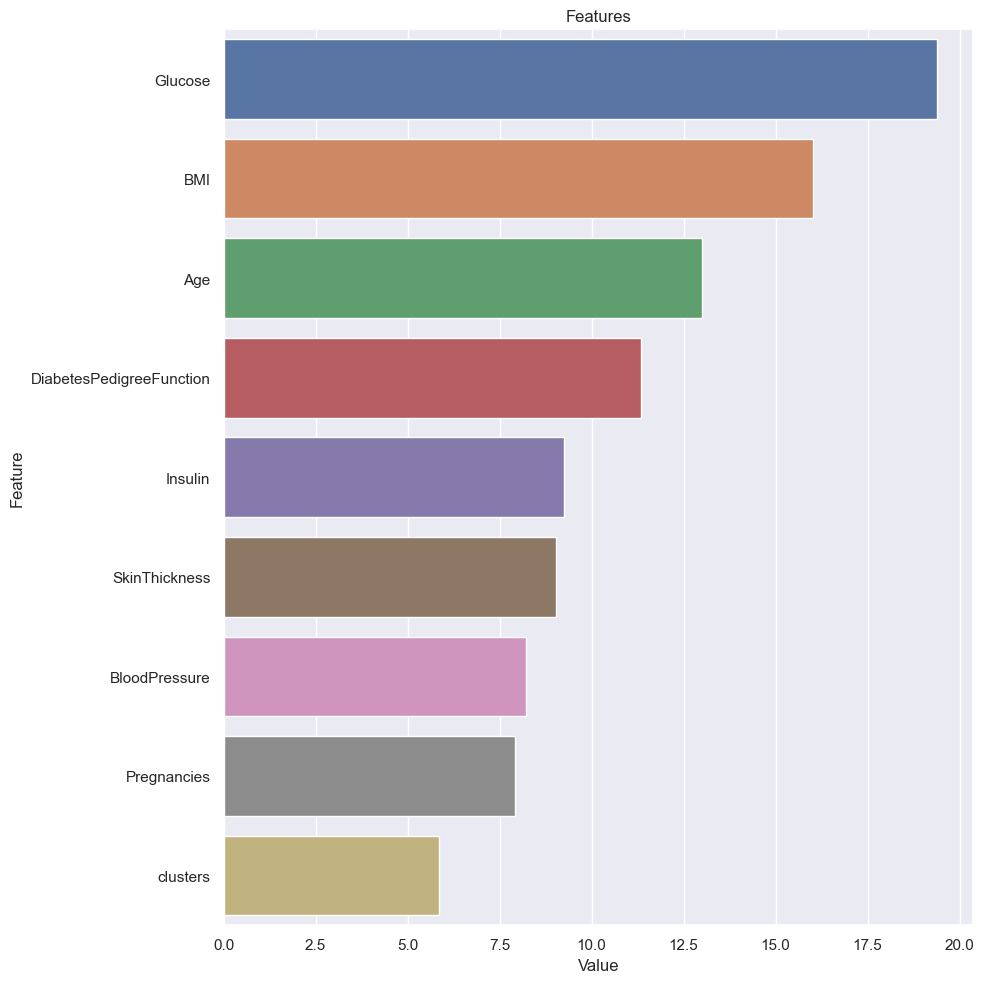

In [43]:
plot_importance(catboost_model, X)

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [45]:
dt_pred=dt.predict(X_test)
print("Train Accuracy of Decesion Tree: ", dt.score(X_train, y_train)*100)
print("Accuracy (Test) Score of Decesion Tree: ", dt.score(X_test, y_test)*100)
print("Accuracy Score of Decesion Tree: ", accuracy_score(y_test, dt_pred)*100)

Train Accuracy of Decesion Tree:  100.0
Accuracy (Test) Score of Decesion Tree:  71.9298245614035
Accuracy Score of Decesion Tree:  71.9298245614035


# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [47]:
lr_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regression: ", lr.score(X_train, y_train)*100)
print("Accuracy (Test) Score of Logistic Regression: ", lr.score(X_test, y_test)*100)
print("Accuracy Score of Logistic Regression: ", accuracy_score(y_test, lr_pred)*100)

Train Accuracy of Logistic Regression:  77.54716981132076
Accuracy (Test) Score of Logistic Regression:  73.68421052631578
Accuracy Score of Logistic Regression:  73.68421052631578


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, lr_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN - True Negative 124
FP - False Positive 21
FN - False Negative 39
TP - True Positive 44
Accuracy Rate: 73.68421052631578
Misclassification Rate: 26.31578947368421


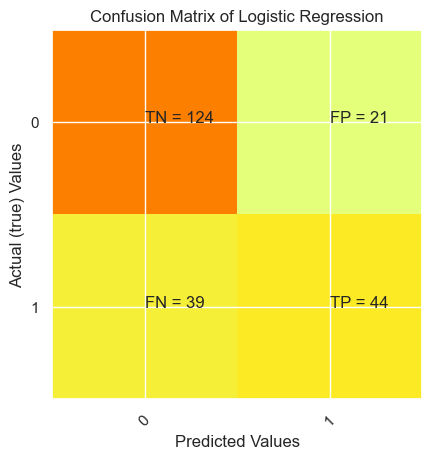

In [49]:

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual (true) Values')
plt.xlabel('Predicted Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))

plt.show()

# Roc Curve

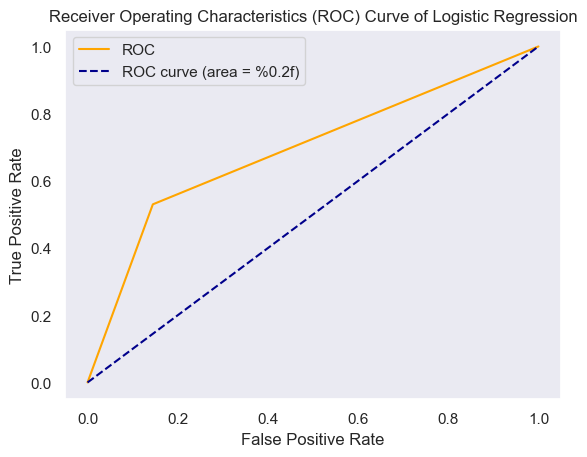

In [50]:

fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
plt.plot(fpr, tpr, color='orange', label="ROC")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics (ROC) Curve of Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.predict(X_test)
rfc.score(X_test, y_test)

0.7368421052631579

# XGBoost

In [52]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [54]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.32%


# Results

In [55]:
results = []

results.append ({"catboost":f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}" })          
results.append ({"random_forest" : rfc.score(X_test, y_test)}) 
results.append ({"xgboost": "Accuracy: %.2f%%" % (accuracy * 100.0)})
results.append ({"Logistic Regression":accuracy_score(y_test, lr_pred)*100})     
results.append ({"Decesion Tree":accuracy_score(y_test, dt_pred)*100 })                               
results

[{'catboost': 'Accuracy: 0.7632'},
 {'random_forest': 0.7368421052631579},
 {'xgboost': 'Accuracy: 76.32%'},
 {'Logistic Regression': 73.68421052631578},
 {'Decesion Tree': 71.9298245614035}]

In [56]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),  
                   ('CatBoost', CatBoostClassifier(verbose=False))]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(X, y, scoring="accuracy" )

Base Models....
accuracy: 0.7468 (LR) 
accuracy: 0.7388 (KNN) 
accuracy: 0.7401 (SVC) 
accuracy: 0.6887 (CART) 
accuracy: 0.7415 (RF) 
accuracy: 0.7269 (XGBoost) 
accuracy: 0.7507 (CatBoost) 


In [57]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500]}


classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
              ]
              

In [58]:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## KNN ##########
roc_auc (Before): 0.7749
roc_auc (After): 0.7937
KNN best params: {'n_neighbors': 9}

########## CART ##########
roc_auc (Before): 0.6593
roc_auc (After): 0.7772
CART best params: {'max_depth': 4, 'min_samples_split': 15}

########## RF ##########
roc_auc (Before): 0.8207
roc_auc (After): 0.8256
RF best params: {'max_depth': 8, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 200}

########## XGBoost ##########
roc_auc (Before): 0.7939
roc_auc (After): 0.8136
XGBoost best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}



In [59]:
import xgboost as xgb
model = XGBClassifier()
model.fit(X_train, y_train)

xgb_params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 200
}


model = xgb.XGBClassifier(**xgb_params)  


model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age  clusters
512        2.000   68.000         70.000         32.000   66.000 25.000                     0.187 25.000         2
94         1.000  163.000         72.000         42.750  175.000 39.000                     1.205 33.000         4
425        1.000   80.000         74.000         11.000   60.000 30.000                     0.527 22.000         2
27         5.000  109.000         75.000         26.000  200.000 36.000                     0.546 60.000         0
207        0.000  140.000         65.000         26.000  130.000 42.600                     0.431 24.000         4
..           ...      ...            ...            ...      ...    ...                       ...    ...       ...
406        1.000  143.000         84.000         23.000  310.000 42.400                     1.076 22.000         5
390        3.000   96.000         56.000         34.000  115.000 24.700         

In [61]:
import pickle
filename="denemepickle"

In [62]:
pickle.dump(xgb.XGBClassifier(**xgb_params), open("denemepickle", 'wb')) 

In [63]:

loaded_model = pickle.load(open(filename, 'rb')) 

In [64]:
loaded_model.fit(X_train,y_train)

loaded_model.predict(X_train)

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [70]:
loaded_model.predict([[1,200,100,20,200,28,0.3,30,20]])

array([1])

# Logistic Regresyon

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [66]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [67]:
lr.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1.

In [69]:
lr.predict([[1,200,100,20,200,28,0.3,30,20]])

array([1.])